In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
label_path = '../data/well_summary_A1_e0891BSA_all.csv'

In [11]:
label = pd.read_csv(label_path)

In [12]:
label.head(5)

,well id,day,median pixel intensity,mw_area shape,hyst1 area,hyst2 area
0,0,0,125.0,7830,512,418
1,1,0,125.0,8265,3044,3008
2,2,0,127.0,8280,30,0
3,3,0,128.0,8096,121,0
4,4,0,128.0,8544,82,0


In [13]:
label.columns

Index(['well id', 'day', 'median pixel intensity', 'mw_area shape',
       'hyst1 area', 'hyst2 area'],
      dtype='object')

In [154]:
label.sort_values(by=['well id','day']).head(10)

,well id,day,median pixel intensity,mw_area shape,hyst1 area,hyst2 area,image_name
0,0,0,125.0,7830,512,418,well0000_day00_well.png
4800,0,1,141.0,7990,434,234,well0000_day01_well.png
9600,0,2,139.0,8148,265,165,well0000_day02_well.png
14400,0,3,138.0,7626,306,218,well0000_day03_well.png
19200,0,4,132.0,6450,444,307,well0000_day04_well.png
24000,0,5,133.0,7387,237,154,well0000_day05_well.png
28800,0,6,135.0,6720,248,139,well0000_day06_well.png
33600,0,7,142.0,6966,374,217,well0000_day07_well.png
38400,0,8,132.0,6557,174,0,well0000_day08_well.png
43200,0,9,131.0,8091,445,232,well0000_day09_well.png


In [2]:
from imageio import imread
from PIL import Image

In [3]:
path = '../data/CS231n_Tim_Shan_example_data/'

In [34]:
def get_image_name(well_id,day_id):
    image_name = 'well'+str(well_id).zfill(4)+'_day'+str(day_id).zfill(2)+'_well.png'
    return image_name

In [38]:
well_image = imread(path+'well0000_day00_well.png')

In [39]:
well_image

Array([[[143, 143, 143, 255],
        [142, 142, 142, 255],
        [140, 140, 140, 255],
        ...,
        [139, 139, 139, 255],
        [139, 139, 139, 255],
        [145, 145, 145, 255]],

       [[143, 143, 143, 255],
        [142, 142, 142, 255],
        [142, 142, 142, 255],
        ...,
        [142, 142, 142, 255],
        [142, 142, 142, 255],
        [143, 143, 143, 255]],

       [[142, 142, 142, 255],
        [140, 140, 140, 255],
        [140, 140, 140, 255],
        ...,
        [145, 145, 145, 255],
        [142, 142, 142, 255],
        [140, 140, 140, 255]],

       ...,

       [[143, 143, 143, 255],
        [143, 143, 143, 255],
        [142, 142, 142, 255],
        ...,
        [143, 143, 143, 255],
        [143, 143, 143, 255],
        [146, 146, 146, 255]],

       [[140, 140, 140, 255],
        [142, 142, 142, 255],
        [143, 143, 143, 255],
        ...,
        [143, 143, 143, 255],
        [143, 143, 143, 255],
        [143, 143, 143, 255]],

       [[142

In [41]:
def imshow_no_ax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

In [120]:
def get_size_and_name(well_id,day_id):
    row = label[(label['well id'] == well_id) & (label['day'] == day_id)]
    image_size = row['mw_area shape'].item()
    image_name = row['image_name'].item()
    return image_size, image_name

In [140]:
def plot_image(well_id,day_id):
    image_size, image_name = get_size_and_name(well_id,day_id)
    well_image = imread(path+image_name)
    imshow_no_ax(well_image, normalize=False)
    plt.title('day'+str(day_id)+' size='+str(image_size))

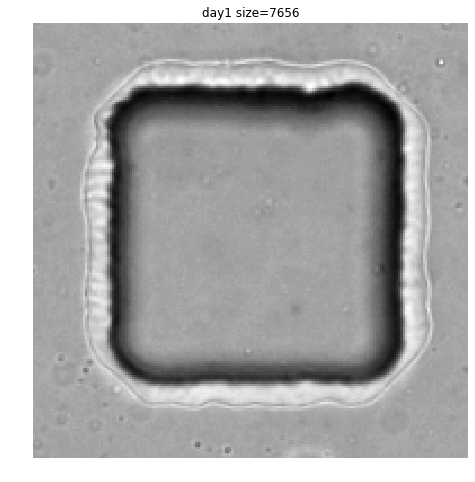

In [149]:
plot_image(4151,1)

In [150]:
def random_plot():
    max_well_id = label['well id'].max()+1
    
    random_well_id = np.random.randint(0,max_well_id)
    print("well id "+ str(random_well_id))
    plt.subplot(1, 4, 1)
    plot_image(random_well_id,0)
    plt.subplot(1, 4, 2)
    plot_image(random_well_id,1)
    plt.subplot(1, 4, 3)
    plot_image(random_well_id,8)
    plt.subplot(1, 4, 4)
    plot_image(random_well_id,13)

well id 3677


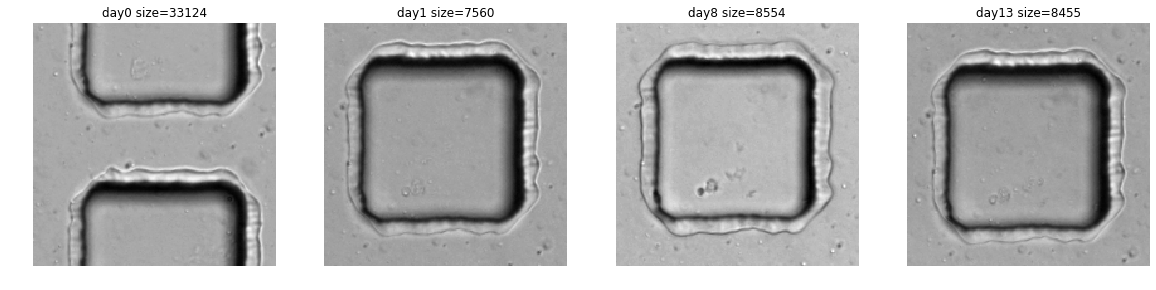

In [152]:
random_plot()

Text(0.5, 1.0, 'size')

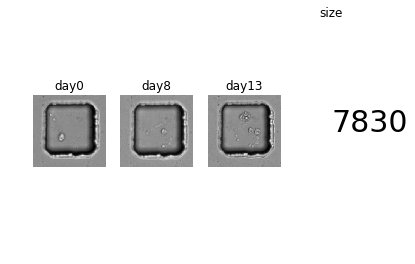

In [67]:
# plt.subplot(1, 3, 1)
# imshow_no_ax(well_image, normalize=False)
# plt.title('day0')
# plt.subplot(1, 3, 2)
# imshow_no_ax(middle_image, normalize=False)
# plt.title('day8')
# plt.subplot(1, 3, 3)
# imshow_no_ax(final_image, normalize=False)
# plt.title('day13')
# plt.subplot(1, 4, 4)
# plt.text(0.5,0.5,"7830" ,size=30)
# plt.gca().axis('off')
# plt.title('size')